## Christian Hansen
## RedOwl Data Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def load_in_and_clean_columns():
    # loads in enron data in local folders and makes unique time files
    enron_df = pd.read_csv('RedOwl-Data-Science-Recruiting-Exam/enron-event-history-all.csv')
    enron_df.columns = ['time','message_id','sender','recipients','topic','mode']
    ## change time to regular from unix time
    enron_df['time']=pd.to_datetime(enron_df['time'],unit='ms')
    # change time to seperate values of time increments
    enron_df['year']=enron_df['time'].dt.year
    enron_df['day']=enron_df['time'].dt.day
    enron_df['date']=enron_df['time'].dt.date
    enron_df['weekday']=enron_df['time'].dt.weekday
    enron_df['month']=enron_df['time'].dt.month
    # add counter to evaluate counts over time
    enron_df['count']=1
    print( enron_df.shape)
    return(enron_df)

In [4]:
enron_df=  load_in_and_clean_columns()
enron_df.head()

(205730, 12)


,time,message_id,sender,recipients,topic,mode,year,day,date,weekday,month,count
0,1998-10-30 23:43:00,<N5QXQ4CHS04FBSJO3TALWRBXATDTIWZ0B@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email,1998,30,1998-10-30,4,10,1
1,1998-10-30 23:56:00,<FEJ0YLF5MHTTF2QHNWMRUODCCHDCPUA5A@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email,1998,30,1998-10-30,4,10,1
2,1998-10-31 00:02:00,<NFC21LWTHYCKD4JV1IQMLSQ4JX2WY1JCB@zlsvr22>,mark legal taylor,shari stack,NaN,email,1998,31,1998-10-31,5,10,1
3,1998-10-31 01:06:00,<LAGJQ1MQZ2HX3APYD2TBODXUA4XF04UOA@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email,1998,31,1998-10-31,5,10,1
4,1998-11-03 03:32:00,<OMETEF4XWA2X3AIQFPFAI1BA4JCP3NZEA@zlsvr22>,mark legal taylor,yao apasu,NaN,email,1998,3,1998-11-03,1,11,1


In [5]:
def get_person_sent_rec(input_df = enron_df):
    rec = enron_df['recipients'].value_counts().reset_index()
    send = enron_df['sender'].value_counts().reset_index()
    df = pd.merge(send,rec,how='inner',on='index').sort_values('sender',ascending=False)
    df.columns = ['person','sender_count','recipients_count']
    df.to_csv('person_sent_recieved_count.csv')
    return(df)

In [6]:
person_sent_rec_df = get_person_sent_rec(enron_df)
person_sent_rec_df.head()

,person,sender_count,recipients_count
0,jeff dasovich,5232,779
1,sara shackleton,4591,2340
2,pete davis,3898,1
3,chris germany,3703,672
4,notes,3314,712


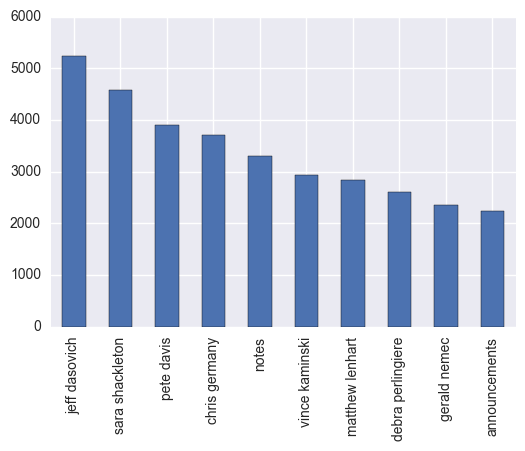

In [7]:
enron_df['sender'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')

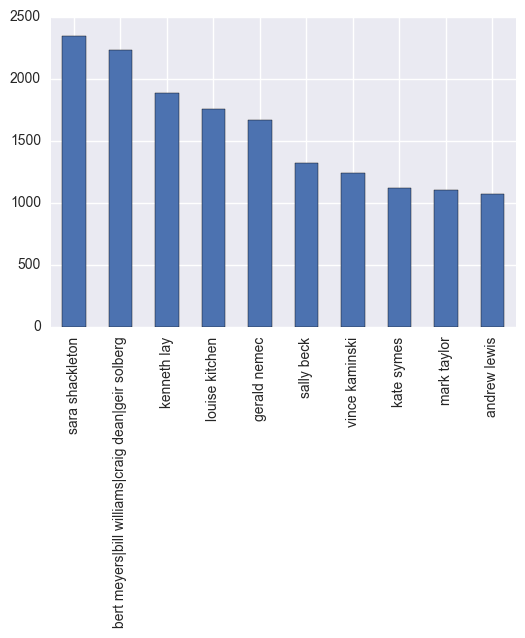

In [8]:
enron_df['recipients'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')

In [57]:
## from the initial dataframe extracting the top ten most prolific senders of emails.
## Global array variable:
top_ten_sender = enron_df['sender'].value_counts().reset_index()['index'][0:10]

In [105]:
def plot_times_sent(df,sender_bool,color = ['grey','green','blue','maroon','teal'],a=0.9):
    # Plot time information for a specified in slice of dataframe for sender
    plt.figure(figsize=(30,7))
    if sender_bool== True:
        name = df.iloc[0]['sender']
        print(name)
    else:
        name ='Total Time Series'
        print(name)
    
    # plot total date 
    plt.subplot(1,5,1)
    df.groupby('date')['sender'].count().plot(kind = 'area',title = 'Counts versus Date',color =color[0],alpha =a,rot =80)
    ax =plt.subplot(1,5,2)
    ## year has issues with ticks so I'll specify ticks better
    date_grouped = df.groupby('year')['sender'].count()
    date_grouped.plot(kind = 'area',title = 'Count versus Year',color=color[1],alpha =1)
    ax.set_xticks(date_grouped.reset_index().year)
    ax.set_xticklabels(date_grouped.reset_index().year)
    ## for the following time increments, where day is day per month,
    #looping through the values makes the most sense to conserve space
    time_list = ['month','weekday','day']
    c = 3
    for time_val in time_list:
        time_name = time_val
        if time_val=='day':
            time_name= time_val + 'per month'
        
        plt.subplot(1,5,c)
        df.groupby(time_val)['sender'].count().plot(kind = 'area',
                                                      title ='Count versus %s' %(time_name) ,color=color[c-1],alpha =a)   
        plt.ylabel('Sent Counts')
        c+=1
    plt.suptitle(name + 'total sent messages for all time increments')
    plt.savefig(name +'total_sent_messages_for_all_time' +'.png')
    plt.show()

In [63]:
# person_df.groupby('date')['sender'].count().plot()

Total Time Series


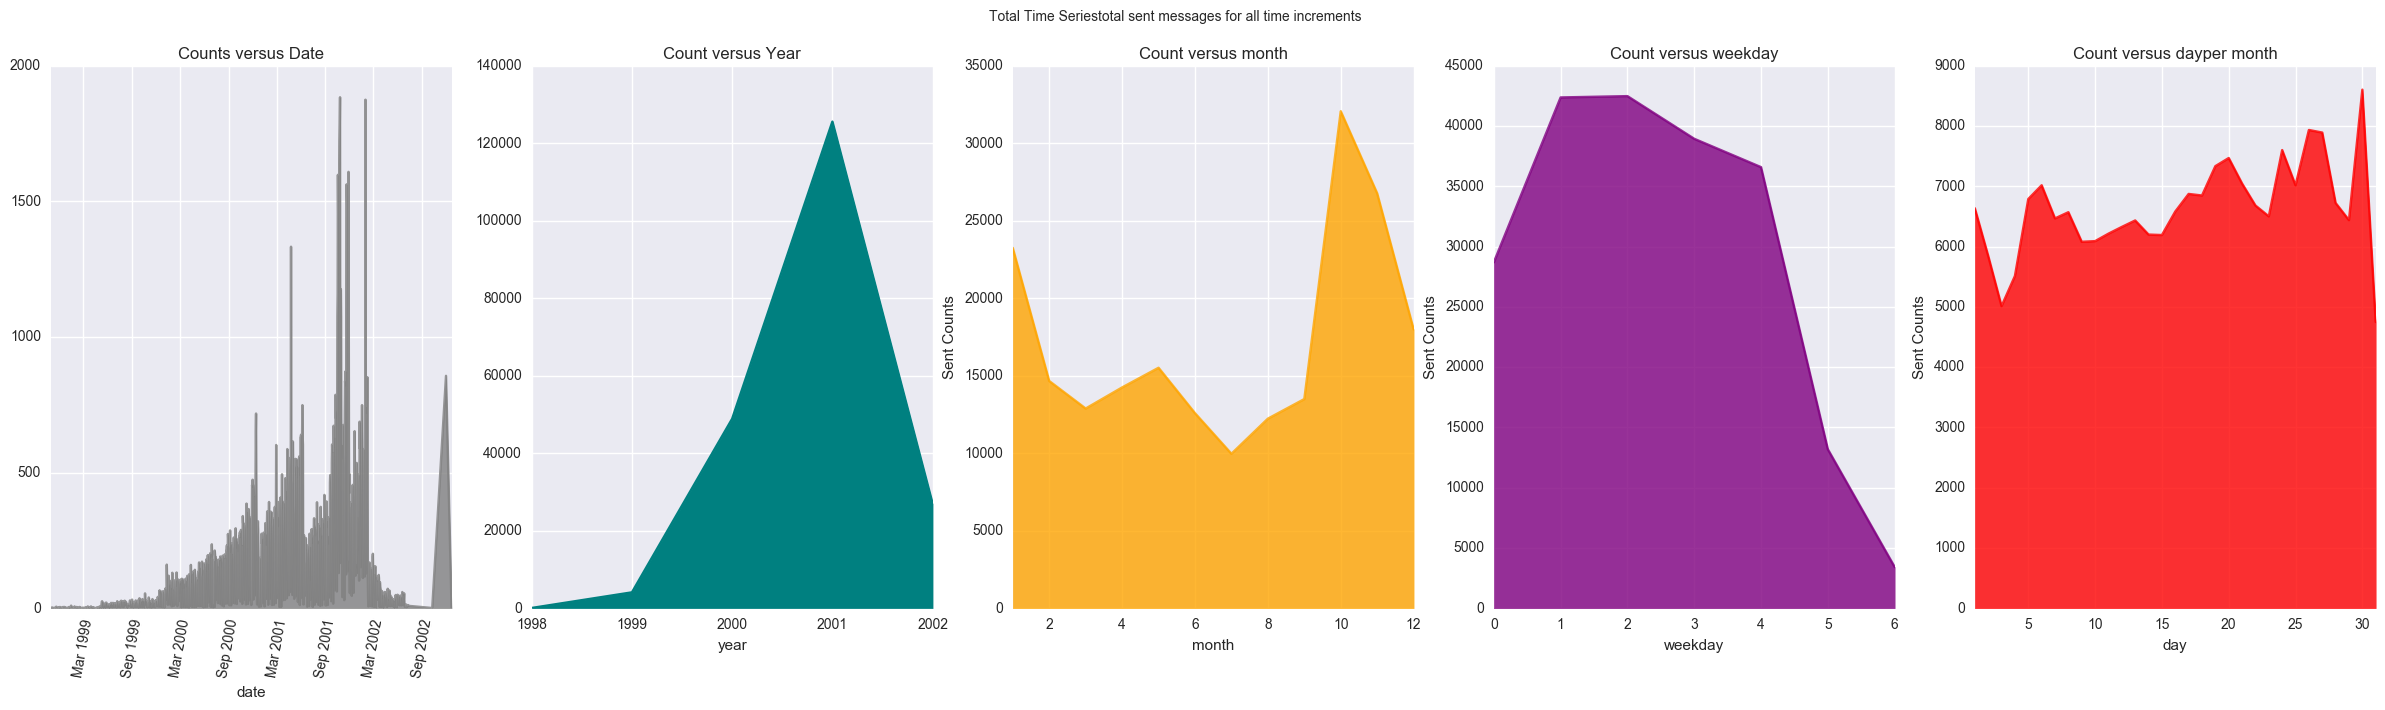

In [64]:
plot_times_sent(enron_df,False,color = ['grey','teal','orange','purple','red'])

In [56]:
## to find all unique contacts of our top ten senders for different times of day.
# I'll have to modify how the data is being grouped and plotted to show unique values
# Since I've grouped and plotted uniquely, there is no better way to approach this than another function.

In [106]:
def plot_all_times_unique_sender(df,name,sender_bool=True, color = ['grey','teal','orange','purple','red']):
    # This function will, based on the recipient name, find all unique senders for all time scales
    reciever_df = df[df['recipients'] == name] 
    time_list =['date','year','month','weekday','day']
    c = 1
    plt.figure(figsize=(30,5))
    for time in time_list:
        time_val=time
        rotate=0
        color_val = color[c-1]
        time_grouped = reciever_df.groupby([time,'sender']).sum().reset_index()
        if time =='year':
            ax = plt.subplot(1,5,c)
            time_grouped.groupby(time)['count'].sum().plot(kind = 'area',
                                                           title='Counts versus year',color=color_val,alpha=1)
            ax.set_xticks(time_grouped.reset_index().year)
            ax.set_xticklabels(time_grouped.reset_index().year)
        else:
            if time =='day':
                time_val ='days per month'
            elif time=='date':
                rotate=90
            ax = plt.subplot(1,5,c)

            time_grouped.groupby(time)['count'].sum().plot(kind = 'area',title="Counts versus %s" % (time_val),
                                                           color=color_val,alpha=1,rot=rotate)
#             ax.set_xticklabels(time_grouped[time])
            plt.ylabel('Sent Counts')
            
        c+=1
                
    plt.suptitle(name+ 'total unique contants for this top sender')
    plt.savefig(name+'total_unique_contants_top_sender' +'.png')
#     return(reciever_df)

In [104]:
def plot_all_top_senders(df=enron_df,unique_sender = True, top_ten = top_ten_sender):
    if unique_sender==True:
        ## this will look at contacts of the top sender and visualize them over time
        for name in top_ten:
             plot_all_times_unique_sender(df,name)
    else:
        #This will look at all the top senders sent out messages over time
        for i in range(0,10):
            person_df = enron_df[enron_df['sender']  == top_ten_sender[i]]
            plot_times_sent(person_df,True)
    

In [102]:
plot_all_top_senders(enron_df,True,top_ten_sender)

,time,message_id,sender,recipients,topic,mode,year,day,date,weekday,month,count
229,1999-04-01 17:44:00,<EGIDF2AIQ3TJWUGUCMIBS2OP2Z0EENBEB@zlsvr22>,mark legal taylor,sara shackleton,NaN,email,1999,1,1999-04-01,3,4,1
302,1999-05-10 22:44:00,<FANU1F3TK512XOFTFLMCQ2FZAKT1CM0BB@zlsvr22>,jan king,sara shackleton,NaN,email,1999,10,1999-05-10,0,5,1
308,1999-05-11 00:33:00,<B3TBT5U2R1ZCMYPU2U5URX4CYBDSPETOA@zlsvr22>,dale neuner,sara shackleton,NaN,email,1999,11,1999-05-11,1,5,1
329,1999-05-11 23:03:00,<DOSZMDE3IBYF2C1GDZV5YYFL234RSVQHB@zlsvr22>,mark legal taylor,sara shackleton,NaN,email,1999,11,1999-05-11,1,5,1
384,1999-05-14 16:26:00,<O5OFY0G5LUNHYXDNGY4UBQALSGWQ3FJSB@zlsvr22>,mary gosnell,sara shackleton,NaN,email,1999,14,1999-05-14,4,5,1
389,1999-05-14 18:00:00,<JTXPMISUIQTP3ZOLEUMIIXMZOJ1CHCAKA@zlsvr22>,bernice rodriguez,sara shackleton,NaN,email,1999,14,1999-05-14,4,5,1
527,1999-05-28 03:50:00,<FC4S5OWFC0GNKAG3OVWAEIJJ3FN2R2F1A@zlsvr22>,stephen douglas,sara shackleton,NaN,email,1999,28,1999-05-28,4,5,1
624,1999-06-10 16:30:00,<LH5VTU5W3DASEHNOIQQKVFS5XTEUMGOLB@zlsvr22>,dale neuner,sara shackleton,NaN,email,1999,10,1999-06-10,3,6,1
635,1999-06-11 17:43:00,<NGHZOREPFWK5PVYDMSI25ONX1YJYIXI3B@zlsvr22>,patricia cini,sara shackleton,NaN,email,1999,11,1999-06-11,4,6,1
647,1999-06-12 22:15:00,<F12ZVY1MSJ4A50TMDFQHSKC1NJZZ3I5UB@zlsvr22>,enronperformancemanagement,sara shackleton,NaN,email,1999,12,1999-06-12,5,6,1


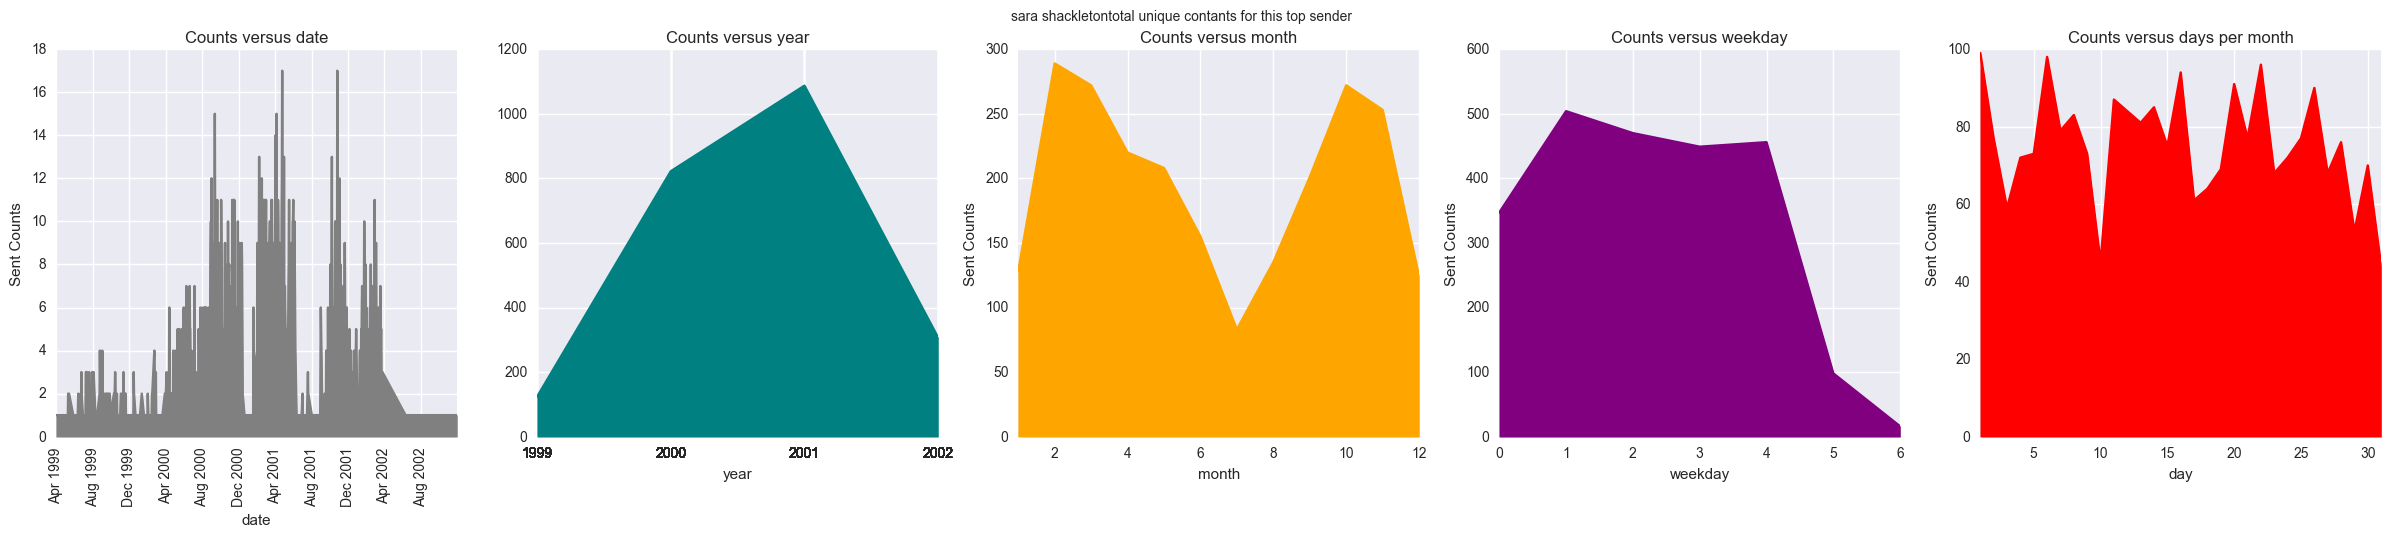

In [103]:
plot_all_times_unique_sender(enron_df,top_ten_sender[1])